# Inflation rate in Indonesia

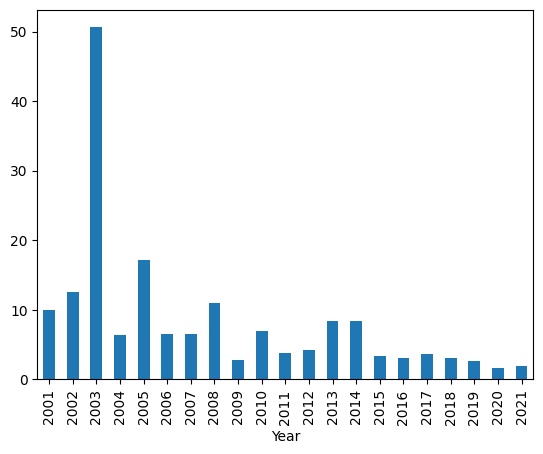

In [34]:
import matplotlib.pyplot as plt
import pandas as pd


def year_preprocess(year: str) -> int:
    year = year.replace("*", "")
    year = year.replace('\u200b', '')
    return int(year)


def inflation_preprocess(inflation: str) -> float:
    inflation = inflation.replace(",", ".")
    inflation = inflation.replace('\u200b', '')
    return float(inflation)


def year_inflation():
    df = pd.read_csv("../dataset/Target Inflasi.csv")

    df.dropna()

    # columns name exist in row 3
    df.columns = df.iloc[3]

    # drop column above column name
    df = df[4:]

    # get year
    df["Year"] = df["Tahun"].apply(year_preprocess)

    df = df[df["Year"] < 2022]

    # get actual inflation
    df["Inflation"] = df["Inflasi Aktual (%,yoy)"].apply(inflation_preprocess)

    # for each year get the latest inflation
    df = df.groupby("Year").nth[[0]]

    return df["Inflation"]


df_inflation = year_inflation()
df_inflation.plot(kind="bar")
plt.show()

# Gold Price

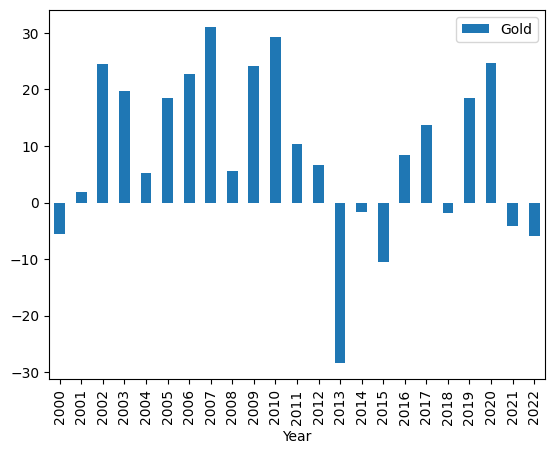

In [37]:
def get_year_gold(value) -> int:
    value = value.split(" ")[2]
    return int(value)


def get_change_rate(value) -> float:
    value = value.replace("%", "")
    value = value.replace(",", ".")
    return float(value)


def get_price(value) -> float:
    value = value.replace(".", "")
    value = value.replace(",", ".")
    return float(value)


def year_gold_price():
    df = pd.read_csv("../dataset/Data Historis Emas Berjangka.csv")

    # get year
    df["Year"] = df["Tanggal"].apply(get_year_gold)

    # get change rate
    df["Gold Change"] = df["Perubahan%"].apply(get_change_rate)

    df["Terakhir"] = df["Terakhir"].apply(get_price)
    df["Pembukaan"] = df["Pembukaan"].apply(get_price)

    end_month = df.groupby("Year").nth[[0]]
    start_month = df.groupby("Year").nth[[-1]]

    return pd.DataFrame(
        data={
            "Gold": (end_month["Terakhir"] - start_month["Pembukaan"]) / start_month["Pembukaan"] * 100
        }
    )


df_gold = year_gold_price()
df_gold.plot(kind="bar")
plt.show()

# Result

In [40]:
def get_result():
    df = pd.merge(df_inflation, df_gold["Gold"], right_index=True, left_index=True)
    df["Gain"] = df["Gold"] - df["Inflation"]
    return df


df_result = get_result()
df_result

,Inflation,Gold,Gain
Year,,,
2001,10.02,1.899196,-8.120804
2002,12.55,24.579606,12.029606
2003,50.60,19.706559,-30.893441
2004,6.40,5.182342,-1.217658
2005,17.11,18.409661,1.299661
2006,6.60,22.715907,16.115907
2007,6.59,31.101377,24.511377
2008,11.06,5.588060,-5.471940
2009,2.78,24.144960,21.364960


In [29]:
df_result.mean()

Inflation     8.327619
Gold         10.406504
Gain          2.078885
dtype: float64